## Language similarity 

### Lang2vec

In [103]:
%pip install lang2vec
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [104]:
import lang2vec.lang2vec as l2v
from scipy.spatial import distance
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Lang2vec uses ISO 639-3 codes to represent the langugaes. 
Here are the relevant codes for our langugaes gotten from https://en.wikipedia.org/wiki/List_of_ISO_639_language_codes  
- English: eng
- Danish: dan
- German: deu
- Polish: pol
- Slovak: slk
- Chinese: zho
- Russian: rus
- Tagalog: tgl
- Swedish: swe
- Serbian: srp
- Croatian: hrv
- Portuguese: por

### Getting the vector representations of the languages 

In [105]:
category = "syntax_knn"
# cateogry = l2v.fs_union(["syntax_wals", "syntax_sswl"])
# Makes a lsit of all the vectors for the languages 
features = l2v.get_features(["eng","zho", "deu", "pol", "slk", "dan", "rus", "tgl", "swe","srp", "hrv", "por"], category)
# index at the language code to get the vector for that language 
# features["srp"]

### Cosine distance between all languages 

In [106]:
languages = ["eng", "zho", "deu", "slk", "dan", "tgl", "srp", "hrv", "swe", "por", "rus"]
for lang1 in languages: 
    for lang2 in languages: 
        if lang1 == lang2:
            continue
        else: 
            vec1 = features[lang1]
            vec2 = features[lang2]
            cos_dist = distance.cosine(vec1, vec2)
            print(f"Distance between {lang1} and {lang2}: {cos_dist}")

Distance between eng and zho: 0.2892275292349138
Distance between eng and deu: 0.09745802098497969
Distance between eng and slk: 0.17840613445904518
Distance between eng and dan: 0.11992176734660287
Distance between eng and tgl: 0.3911844526817908
Distance between eng and srp: 0.2040809427572
Distance between eng and hrv: 0.16819960814394175
Distance between eng and swe: 0.06658369264033637
Distance between eng and por: 0.15760299761174978
Distance between eng and rus: 0.18824593690905445
Distance between zho and eng: 0.2892275292349138
Distance between zho and deu: 0.3650978223428444
Distance between zho and slk: 0.3247889635715203
Distance between zho and dan: 0.32461836649402953
Distance between zho and tgl: 0.4811254783372292
Distance between zho and srp: 0.34979677973553813
Distance between zho and hrv: 0.316400927218525
Distance between zho and swe: 0.2986421498207229
Distance between zho and por: 0.33333333333333337
Distance between zho and rus: 0.3081673044496388
Distance betwe

In [107]:
languages = ["zho", "hrv", "dan", "eng", "deu", "por", "rus", "srp", "slk", "swe"]
# chinese croatian danish english german portugese russian serbian slovakian swedish

def get_lang_sims(input_lang):
    sims_list = []
    for lang in languages: 
        if input_lang == lang:
            continue
        else: 
            vec1 = features[input_lang]
            vec2 = features[lang]
            cos_dist = distance.cosine(vec1, vec2)
            sims_list.append(cos_dist)
    return sims_list

eng_list = get_lang_sims("eng")
hrv_list = get_lang_sims("hrv")

### Features 



In [108]:
l2v.FEATURE_SETS

['syntax_wals',
 'phonology_wals',
 'syntax_sswl',
 'syntax_ethnologue',
 'phonology_ethnologue',
 'inventory_ethnologue',
 'inventory_phoible_aa',
 'inventory_phoible_gm',
 'inventory_phoible_saphon',
 'inventory_phoible_spa',
 'inventory_phoible_ph',
 'inventory_phoible_ra',
 'inventory_phoible_upsid',
 'syntax_knn',
 'phonology_knn',
 'inventory_knn',
 'syntax_average',
 'phonology_average',
 'inventory_average',
 'fam',
 'id',
 'geo',
 'learned']

More info here: https://github.com/antonisa/lang2vec

Meanings: 
- syntax: the arrangement of words and phrases
- phonology: the study of the patterns of sounds in a language and across languages
- geo: distance from fixed points on earth's surface 
- id: one-hot identity vector 
- fam: membership in language families and subfamil_ies

Additonal suffixes: 
- _avergage: averages of sets 
- _knn: KNN predictions of feature values 
- _learned: 512-dimensional vectors learned by a neural network over data from 1017 languages, trained for typological prediction 
- _wals: feature derived from the World Atlas of Language Structures 
- _sswl : Features derived from Syntactic Structures of the World's Languages
- _ethnologue : Features derived from (shallowly) parsing the prose typological descriptions in Ethnologue 
- _phoible_aa : AA = Alphabets of Africa. Features derived from PHOIBLE's normalization of Systèmes alphabétiques des langues africaines 

Union: 
- You can union two feature sets using l2v.fs_union(["feature1", "feature2"])
- Combines vectors by taking element-wise max among corresponding dimensions of the vectors 
- Useful when you want to capture the maximum information from each language embedding without losing any data
- Suitable when you want to create a joint representation that incorporates the most significant features from each language

Concatenation
- You can concatenate two feature sets using l2v.fs_concatenation(["feature1", "feature2"])
- Appends the vectors together along a specific axis to create a longer, combined vector
- Useful when you want to preserve the individual characteristics of each language embedding while creating a larger, joint embedding space
- Suitable when you want to maintain the distinctiveness of each language while still creating a joint representation

Union vs concatenation: 
-  Union function focuses on preserving the maximum information from each language embedding, while the concatenation function retains the individual characteristics of each embedding by combining them along a specified axis
Which is best for us? 
- Depends on whether we want to prioritize capturing the maximum information from each language embedding (union) or preserving the individual characteristics of each embedding (concatenation)

### Displaying results and land sim 

In [109]:
# getting testing results data
df = pd.read_excel('NEW_testing_results.xlsx')

print(df)
eng_scores = list(df["English score"])
del eng_scores[3]
print(eng_scores)

hrv_scores = list(df["Croatian score"])
del hrv_scores[1]
print(hrv_scores)

  UNER Datasets   Language  English score  Slovakian score  Danish score  \
0        zh_pud    Chinese       0.711516         0.568163      0.510234   
1        hr_set   Croatian       0.764787         0.739639      0.712329   
2        da_ddt     Danish       0.752566         0.674234      0.821267   
3        en_ewt    English       0.800000         0.514056      0.538851   
4        de_pud     German       0.781015         0.662759      0.616639   
5        pt_pud  Portugese       0.804114         0.682655      0.622222   
6        ru_pud    Russian       0.666042         0.614403      0.570683   
7        sr_set    Serbian       0.772130         0.759107      0.709607   
8        sk_snk  Slovakian       0.672593         0.765351      0.602685   
9        sv_pud    Swedish       0.820611         0.741859      0.730539   

   Croatian score  Serbian score  
0        0.598666       0.550689  
1        0.904311       0.877365  
2        0.794183       0.711253  
3        0.623330      

#### English model

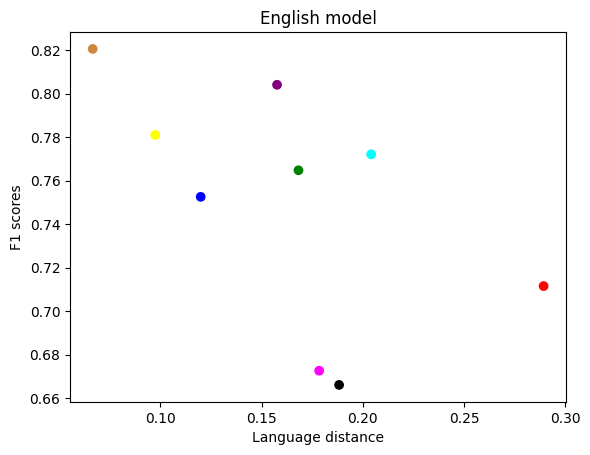

In [110]:
# Define x, y, and colors for each point
#langs = ["zho", "deu", "slk", "dan","srp", "hrv", "swe", "por", "rus"]
langs = ["zho", "hrv", "dan", "deu", "por", "rus", "srp", "slk", "swe"]
#f1_score = np.array([0.6783899961, 0.7845509539, 0.6596356663, 0.7519294377, 0.7576419214, 0.747962178, 0.8308858361, 0.8037718904, 0.6556473829])

colors = ['red', 'green', 'blue', 'yellow', 'purple', "black", "cyan",  "magenta", "peru"]

# Create a scatter plot with multiple colors
plt.scatter(eng_list, eng_scores, c=colors)

# Add labels and title
plt.xlabel('Language distance')
plt.ylabel('F1 scores')
plt.title('English model')

plt.savefig('graphs/english_graph.png')
plt.show()

### Croatian model

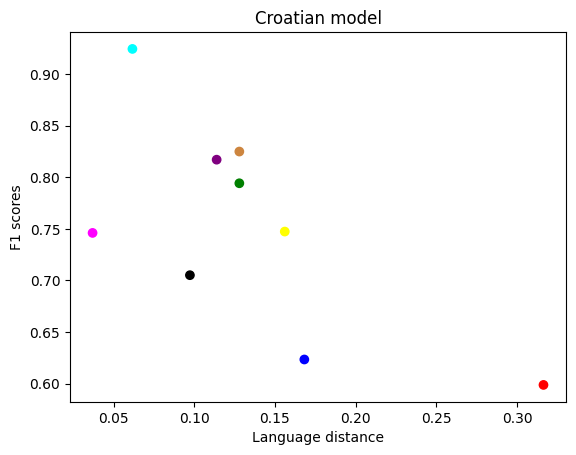

In [111]:
# Define x, y, and colors for each point
#langs = ["zho", "deu", "slk", "dan","srp", "eng", "swe", "por", "rus"]
languages = ["zho", "dan", "eng", "deu", "por", "rus", "srp", "slk", "swe"]
#f1_score = [0.5397840864, 0.7059352518, 0.6980351603, 0.7878103837,0.9158878505, 0.5765426284, 0.7816635161 ,  0.7569178374, 0.6571952337]

colors = ['red', 'green', 'blue', 'yellow', 'purple', "black", "cyan", "magenta", "peru"]

# Create a scatter plot with multiple colors
plt.scatter(hrv_list, hrv_scores, c=colors)

# Add labels and title
plt.xlabel('Language distance')
plt.ylabel('F1 scores')
plt.title('Croatian model')

plt.savefig('graphs/croatian_graph.png')
plt.show()

### Testing for all languages

In [112]:
language_codes = {
    "English": "eng",
    "Danish": "dan",
    "German": "deu",
    "Slovakian": "slk",
    "Chinese": "zho",
    "Russian": "rus",
    "Swedish": "swe",
    "Serbian": "srp",
    "Croatian": "hrv",
    "Portugese": "por"
}

def get_similarities_all_langs(language):
    sims_list = {}
    input_lang = language_codes[language]

    for lang in language_codes.values(): 
        vec1 = features[input_lang]
        vec2 = features[lang]
        
        cos_dist = distance.cosine(vec1, vec2)
        sims_list[lang] = cos_dist
    return sims_list


def get_scores(lang):
    lang_scores = {}
    for index, row in df.iterrows():
        language = row['Language']
        language_code = language_codes[language]
        score = row[f'{lang} score']
        lang_scores[language_code] = score


    return lang_scores


In [113]:
eng_sim = get_similarities_all_langs("English")
dan_sim = get_similarities_all_langs("Danish")
slk_sim = get_similarities_all_langs("Slovakian")
srp_sim = get_similarities_all_langs("Serbian")
hrv_sim = get_similarities_all_langs("Croatian")

In [114]:
eng_score = get_scores("English")
dan_score = get_scores("Danish")
slk_score = get_scores("Slovakian")
srp_score = get_scores("Serbian")
hrv_score = get_scores("Croatian")

In [115]:
eng_score

{'zho': 0.711516,
 'hrv': 0.764787,
 'dan': 0.752566,
 'eng': 0.8,
 'deu': 0.781015,
 'por': 0.804114,
 'rus': 0.666042,
 'srp': 0.77213,
 'slk': 0.672593,
 'swe': 0.820611}

In [116]:
eng_sim

{'eng': 0,
 'dan': 0.11992176734660287,
 'deu': 0.09745802098497969,
 'slk': 0.17840613445904518,
 'zho': 0.2892275292349138,
 'rus': 0.18824593690905445,
 'swe': 0.06658369264033637,
 'srp': 0.2040809427572,
 'hrv': 0.16819960814394175,
 'por': 0.15760299761174978}

In [117]:
# Get the languages from the df and assign them colours for the plot
languages = list(df["Language"])
colors = ['red', 'green', 'blue', 'yellow', 'purple', "black", "cyan",  "magenta", "peru"]

# making a dictionary with languages and colours
lang_colors = dict(zip(languages, colors))

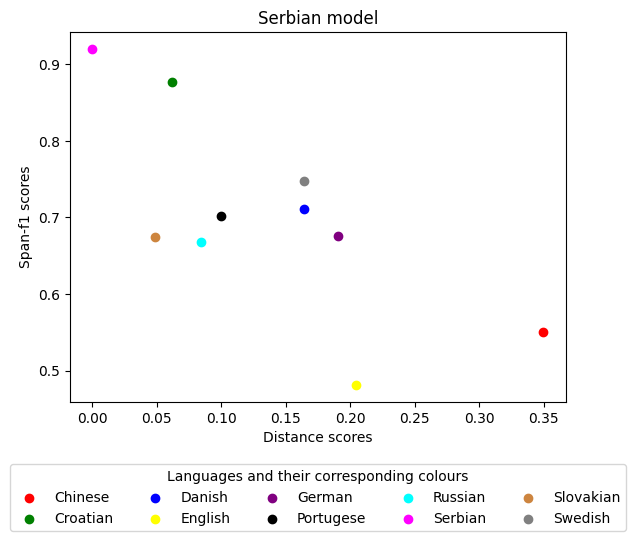

Pearson's correlation coefficient for Serbian model:  -0.7249645899739251


In [118]:

# This is the stuff you need to change
model_language = "Serbian"
similarity_scores = srp_sim
span_scores = srp_score

# Initialize lists to store x and y values
x_values = []
y_values = []


# Iterate over keys in the dictionaries
for lang_code in span_scores.keys():
    # Check if the key exists in both dictionaries
    if lang_code in similarity_scores:
        # Append x and y values
        x_values.append(similarity_scores[lang_code])
        y_values.append(span_scores[lang_code])

for lang, distance, score in zip(languages, x_values, y_values):
    plt.scatter(distance, score, c=lang_colors.get(lang, 'gray'), label=lang)

# Create legend under the plot and adjust its width
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, title = "Languages and their corresponding colours")
    
# Add labels and title
plt.xlabel('Distance scores')
plt.ylabel('Span-f1 scores')
plt.title(f'{model_language} model')
plt.savefig(f'graphs/{model_language}_graph_legend_new.png', bbox_inches='tight')

plt.show()

pearson_corr = np.corrcoef(x_values, y_values)[0,1]

print(f"Pearson's correlation coefficient for {model_language} model: ", pearson_corr)


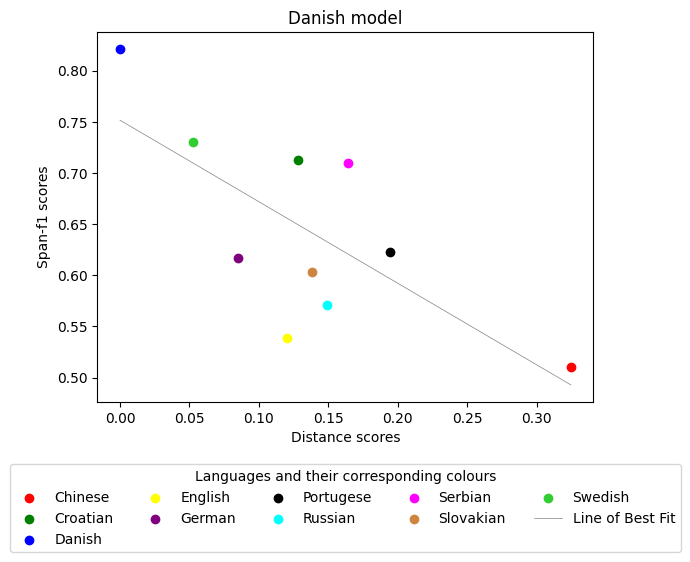

Pearson's correlation coefficient: -0.7144467384261165


In [125]:
# This is the stuff you need to change
model_language = "Danish"
similarity_scores = dan_sim
span_scores = dan_score

# Initialize lists to store x and y values
x_values = []
y_values = []

# Iterate over keys in the dictionaries
for lang_code in span_scores.keys():
    # Check if the key exists in both dictionaries
    if lang_code in similarity_scores:
        # Append x and y values
        x_values.append(similarity_scores[lang_code])
        y_values.append(span_scores[lang_code])

for lang, distance, score in zip(languages, x_values, y_values):
    plt.scatter(distance, score, c=lang_colors.get(lang, 'limegreen'), label=lang)

#plot the best fit line
x = np.array(x_values)
y = np.array(y_values)
a, b = np.polyfit(x, y, 1)

x_fit = np.linspace(min(x), max(x), 100)
y_fit = a * x_fit + b

# Plot the best fit line
plt.plot(x_fit, y_fit, color='gray', linewidth=0.5, label='Line of Best Fit')


# Create legend under the plot and adjust its width
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, title = "Languages and their corresponding colours")
    
# Add labels and title
plt.xlabel('Distance scores')
plt.ylabel('Span-f1 scores')
plt.title(f'{model_language} model')
plt.savefig(f'graphs/00_NEW_{model_language}_CORRECT.png', bbox_inches='tight')

plt.show()

#Get corrleation coef
pearson_corr = np.corrcoef(x_values, y_values)[0, 1]
print("Pearson's correlation coefficient:", pearson_corr)